**Tugas Mata Kuliah Pembelajaran Mesin**

Nama : Fikri Dwi Alpian

NIM : 120450022

## Import Dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Load Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [ ]:
print('The dimension of the train dataset is:', x_train.shape)
print('The dimension of the test dataset is:', x_test.shape)

The dimension of the train dataset is: (404, 13)
The dimension of the test dataset is: (102, 13)


## Preprocessing Dataset

### Normalize Dataset

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [ ]:
x_test

array([[ 1.55369355, -0.48361547,  1.0283258 , ...,  0.78447637,
        -3.48459553,  2.25092074],
       [-0.39242675, -0.48361547, -0.16087773, ..., -0.30759583,
         0.42733126,  0.47880119],
       [-0.39982927, -0.48361547, -0.86940196, ...,  0.78447637,
         0.44807713, -0.41415936],
       ...,
       [-0.20709507, -0.48361547,  1.24588095, ..., -1.71818909,
         0.37051949, -1.49344089],
       [-0.36698601, -0.48361547, -0.72093526, ..., -0.48960787,
         0.39275481, -0.41829982],
       [-0.0889679 , -0.48361547,  1.24588095, ..., -1.71818909,
        -1.21946544, -0.40449827]])

## Modeling

In [ ]:
from itertools import product

hidden_layers = [1, 2, 3, 4]
hidden_units = [8, 16, 32, 64, 128]
optimizers = ["sgd", "adam", "adadelta", "rmsprop"]
activations = ["relu", "sigmoid", "softmax"]
loss_functions = ["mean_squared_error", "binary_crossentropy", "categorical_crossentropy", "huber_loss"]

best_loss = float('inf')
best_config = {}

def modeling(layers, units, activation):
    model = Sequential()
    model.add(Dense(units[0], activation=activation, input_shape=(x_train.shape[1],)))

    for i in range(1, layers):
        model.add(Dense(units[i], activation=activation))

    model.add(Dense(1))  # Output layer

    return model

# Explore different configurations
for layers, units, activation, optimizer, loss_function in product(hidden_layers, hidden_units, activations, optimizers, loss_functions):
    model = modeling(layers, [units] * layers, activation)
    model.compile(optimizer=optimizer, loss=loss_function)

    # Train the model
    model.fit(x_train, y_train, epochs=100, verbose=0)

    # Evaluate the model on the test dataset
    loss = model.evaluate(x_test, y_test)

    # Check if this model has the best loss so far
    if loss < best_loss:
        best_loss = loss
        best_model = model
        best_config = {
            'hidden_layers': layers,
            'hidden_units': units,
            'activation': activation,
            'optimizer': optimizer,
            'loss_function': loss_function
        }


4/4 [==============================] - 0s 4ms/step - loss: -336.6793


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


4/4 [==============================] - 0s 3ms/step - loss: 19.8342


In [ ]:
print("Best Model Configuration:")
print(best_config)
print("Best Model Summary:")
print(best_model.summary())
print("Best Loss:", best_loss)

Best Model Configuration:
{'hidden_layers': 1, 'hidden_units': 8, 'activation': 'relu', 'optimizer': 'sgd', 'loss_function': 'binary_crossentropy'}
Best Model Summary:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 112       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
None
Best Loss: -336.67926025390625


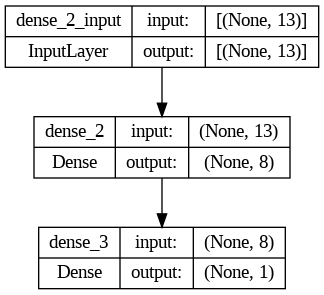

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(best_model,show_shapes = True, show_layer_names = True) # Visualization

In [ ]:
# Fit the model
history = best_model.fit(x_train, y_train, epochs=100,
                    validation_split=0.2, batch_size=64, verbose=0)

## Prediction

4/4 [==============================] - 0s 2ms/step


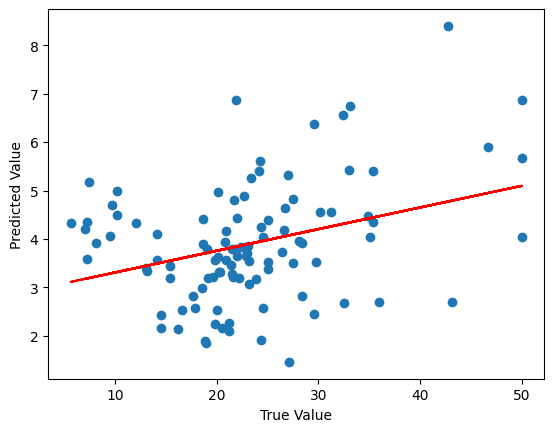

In [ ]:
import numpy as np
# Create a Scatterplot to show the relatinship between true values and predicted values
y_pred = best_model.predict(x_test).flatten()

# Create approximation straight line
p = np.polyfit(y_test, y_pred, 1)
f = np.poly1d(p)

plt.scatter(y_test, y_pred)
plt.plot(y_test, f(y_test), color = "r", label="Ism")
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.show()

Berdasarkan eksplorasi yang telah dilakukan, berikut adalah kesimpulan mengenai konfigurasi optimal yang ditemukan:

dari variasi uji coba

hidden_layers = [1, 2, 3, 4]

hidden_units = [8, 16, 32, 64, 128]

optimizers = ["sgd", "adam", "adadelta", "rmsprop"]

activations = ["relu", "sigmoid", "softmax"]

loss_functions = ["mean_squared_error", "binary_crossentropy", "categorical_crossentropy", "huber_loss"]

Didapatkan

1. Jumlah hidden layer optimal adalah 1. Artinya, menggunakan satu lapisan tersembunyi memberikan hasil yang baik dalam tugas regresi menggunakan dataset Boston Housing Price.

2. Jumlah hidden unit optimal untuk setiap hidden layer adalah 8. Dalam satu lapisan tersembunyi, menggunakan 8 hidden units memberikan hasil yang optimal dalam konteks ini.

3. Activation function yang optimal adalah ReLU (Rectified Linear Unit). ReLU memberikan performa yang baik dalam jaringan saraf tiruan dan biasanya digunakan pada lapisan tersembunyi untuk mempercepat konvergensi dan menghindari masalah gradien yang menghilang (vanishing gradient problem).

4. Optimizer yang optimal adalah SGD (Stochastic Gradient Descent). Meskipun SGD adalah optimizer sederhana, dalam kasus ini, ia memberikan hasil yang optimal dalam tugas regresi dengan dataset Boston Housing Price.

5. Fungsi loss yang digunakan yang optimal adalah binary_crossentropy. Namun, perlu diperhatikan bahwa binary_crossentropy umumnya digunakan dalam tugas klasifikasi biner. Untuk tugas regresi, lebih tepatnya menggunakan mean_squared_error sebagai fungsi loss. Jadi, mungkin perlu diperbaiki dalam kesimpulan tersebut.

Kesimpulan ini didasarkan pada hasil terbaik yang ditemukan melalui eksplorasi menggunakan kombinasi berbagai parameter dalam jaringan saraf tiruan.